In [20]:
from astropy.io import fits
from astropy.table import Table
img = fits.open('spec-57407-KP062035N253629V01_sp04-227.fits')
img.info()


Filename: spec-57407-KP062035N253629V01_sp04-227.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     126   (3909, 5)   float32   


<Table length=5>
    col0          col1          col2     ... col3906  col3907 col3908 
  float32       float32       float32    ... float32  float32 float32 
------------ ------------- ------------- ... -------- ------- --------
   41875.688     42587.176      42882.72 ...      0.0     0.0      0.0
1.002703e-05 1.0186371e-05 1.0344004e-05 ...      0.0     0.0      0.0
   3699.9863     3700.8384     3701.6907 ... 9094.945 9097.04 9099.135
         0.0           0.0           0.0 ...      0.0     0.0      0.0
         0.0           0.0           0.0 ...      0.0     0.0      0.0

Filename: spec-55960-GAC_071N47_V1_sp04-038.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     126   (3902, 5)   float32   
   col0      col1      col2      col3   ... col3898  col3899  col3900 col3901
--------- --------- --------- --------- ... -------- -------- ------- -------
788.43225  618.0004 1688.1781 1860.1388 ...      0.0      0.0     0.0     0.0
      0.0       0.0       0.0       0.0 ...      0.0      0.0     0.0     0.0
3699.9863 3700.8384 3701.6907  3702.543 ... 9078.208 9080.298 9082.39 9084.48
      0.0       0.0       0.0       0.0 ...      0.0      0.0     0.0     0.0
      0.0       0.0       0.0       0.0 ...      0.0      0.0     0.0     0.0
Flux:
   col0      col1     col2     col3   ... col3598 col3599 col3600 col3601
--------- --------- -------- -------- ... ------- ------- ------- -------
1596.5548 1492.2244 1443.207 1188.821 ...     0.0     0.0     0.0     0.0
Wavelength:
   col0      col1      col2      col3 

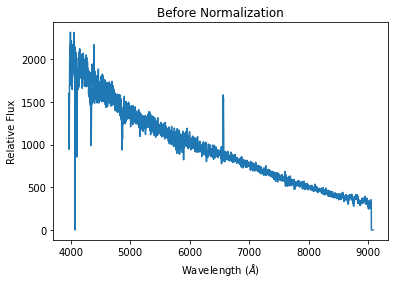

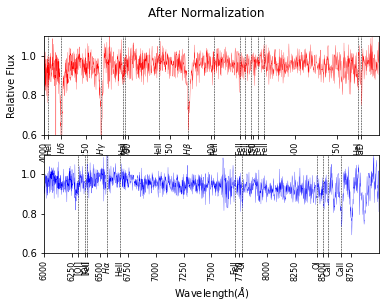

In [8]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import os
import laspec
from laspec import line_index
import matplotlib.backends.backend_pdf as pdf
from laspec import normalization
pdff = pdf.PdfPages("Normalised_spec_all_NEW.pdf")
hdu = fits.open('spec-55960-GAC_071N47_V1_sp04-038.fits')
hdu.info()
spectra = hdu[0].data
print(Table(spectra))
flux = spectra[0]
wavelength = spectra[2]
f1 = flux[300:4200]
w1 = wavelength[300:4200]
print("Flux:")
print(Table(f1))
print("Wavelength:")
print(Table(w1))
plt.plot(w1,f1)
plt.xlabel('Wavelength ($\AA$)')
plt.ylabel('Relative Flux')
plt.title('Before Normalization')
plt.savefig('MYGRAPH_nonorm.jpeg')
a= normalization.normalize_spectrum_general(w1,f1, p=1e-6, q=0.8,niter=100)
a = np.array([a])

fig, axes = plt.subplots(2,1)
plt.suptitle('After Normalization')
axes[1].set_xlabel('Wavelength($\AA$)')
axes[0].set_ylabel('Relative Flux')
axes[0].set_xlim(4000,6000)
axes[0].set_ylim(0.6,1.1)
axes[1].set_xlim(6000,9000)
axes[1].set_ylim(0.6,1.1)

feii = [4026,4102,4341,4471,4481,4862,5018,5169,5198,5235,5276,5316,5876,5893,4686,6300,6363,6384,6563,7712,7774,8446,8498,8542,8662,6678]
for val in list(feii):
    if val<6000:
        axes[0].axvline(x=val,color='k',linestyle='--',linewidth=0.5,label='H beta lineat 4862$\AA$')
    else:
        axes[1].axvline(x=val,color='k',linestyle='--',linewidth=0.5,label='H beta lineat 4862$\AA$')
#LABELLING THE IMPORTANT EMISSION LINES
xticks1 = [4026,4102,4341,4471,4481,4862,5018,5169,5198,5235,5276,5316,5876,5893,4686]
x1_labels = ['HeI',r'$H\delta$',r'$H\gamma$','HeI','MgII',r'$H\beta$','FeII','FeII','FeII','FeII','FeII','FeII','HeI','NaD','HeII']
xticks2 = [6300,6363,6384,6563,7712,7774,8446,8542,8662,6678]
x2_labels = ['[OI]','[OI]','FeII',r'$H\alpha$','FeII','OI','OI','CaII','CaII','HeII']
xticks3 = np.arange(4000,6000,250)
xticks4 = np.arange(6000,9000,250)

#SETTING X-TICKS AND PLOTTING
for i in [0]:
    axes[i].set_xticks(list(xticks1)+list(xticks3),minor=False)	
    axes[i].set_xticklabels(x1_labels+list(xticks3))
    plt.setp(axes[i].get_xticklabels(), fontsize=8,rotation=90)
for i in [1]:
    axes[i].set_xticks(list(xticks2)+list(xticks4),minor=False)	
    axes[i].set_xticklabels(x2_labels+list(xticks4))
    plt.setp(axes[i].get_xticklabels(), fontsize=8,rotation=90)


axes[0].plot(w1, a[0][0], color = 'r', linewidth = 0.25)
axes[1].plot(w1,a[0][0], color = 'b', linewidth = 0.25)
fig.savefig('MYGRAPH_norm.jpeg')
pdff.savefig(fig)

pdff.close()

In [45]:
# Finding EW of H gamma line for the given FITS file
from laspec import line_index
line_info_dict = {'line_center': 4341, #wavelength of H gamma line
             'line_range' : (4339,4342), #some range in which the wavelength of the line falls
             'line_shoulder_left': (4330, 4339), #not sure about shoulder left and right
             'line_shoulder_right': (4350, 4360)}
EW = line_index.measure_line_index(w1,f1,flux_err=None, mask=None, 
                                   z=None, line_info = line_info_dict, num_refit=(100, None), 
                                   filepath=None, return_type='dict', verbose=False) #function to find EW

In [46]:
print("The EW of ", r'$H\gamma$', " line is", EW['EW_int'])
print("The EW error is",EW['EW_int_err'])

The EW of  $H\gamma$  line is 0.8622428
The EW error is 0.1495537479625797
